---
title: GSB - S544 Practice Activity 8.1
author: Karissa Mohr
format:
  html:
    embed-resources: true
echo: true
theme: lux
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1]:
!pip install palmerpenguins

In [2]:
import pandas as pd
from palmerpenguins import load_penguins

In [33]:
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [36]:
X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]

In [42]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,bill_length_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,181.0,3750.0,2007,False,False,False,True,True
1,39.5,186.0,3800.0,2007,False,False,False,True,False
2,40.3,195.0,3250.0,2007,False,False,False,True,False
4,36.7,193.0,3450.0,2007,False,False,False,True,False
5,39.3,190.0,3650.0,2007,False,False,False,True,True


In [44]:
X[X.select_dtypes(bool).columns] = X.select_dtypes(bool).astype(int)

In [47]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
X_dummies = enc.fit_transform(X)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [49]:
# Model 1: Multiple Linear Regression Model
model1= LinearRegression()
model1.fit(X, y)

LinearRegression()

In [53]:
train_mse_lr = mean_squared_error(y_train, model1.predict(X_train))
test_mse_lr  = mean_squared_error(y_test, model1.predict(X_test))

In [54]:
# Model 2: KNN Model 1
model2 = KNeighborsRegressor(n_neighbors=5)
model2.fit(X, y)


KNeighborsRegressor()

In [55]:
train_mse_knn1 = mean_squared_error(y_train, model2.predict(X_train))
test_mse_knn1  = mean_squared_error(y_test, model2.predict(X_test))

In [84]:
# Model 3: KNN Model 2
model3 = KNeighborsRegressor(n_neighbors=20)
model3.fit(X, y)

KNeighborsRegressor(n_neighbors=20)

In [85]:
train_mse_knn2 = mean_squared_error(y_train, model3.predict(X_train))
test_mse_knn2 = mean_squared_error(y_test, model3.predict(X_test))

In [59]:
# Model 4: Decision Tree Model
model4 = DecisionTreeRegressor(max_depth=5, random_state=42)
model4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [60]:
train_mse_tree = mean_squared_error(y_train, model4.predict(X_train))
test_mse_tree  = mean_squared_error(y_test, model4.predict(X_test))

In [86]:
# Plot Models
models = ["Linear Regression", "KNN 1", "KNN 2", "Decision Tree"]
train_errors = [train_mse_lr, train_mse_knn1, train_mse_knn2, train_mse_tree]
test_errors  = [test_mse_lr,  test_mse_knn1,  test_mse_knn2,  test_mse_tree]
model_type  = [1, 2, 3, 4]

In [62]:
from plotnine import *

In [87]:
df = pd.DataFrame({
    "Model": models * 2,
    "Model Type": model_type * 2,
    "MSE": train_errors + test_errors,
    "Type": ["Train"] * 4 + ["Test"] * 4
})

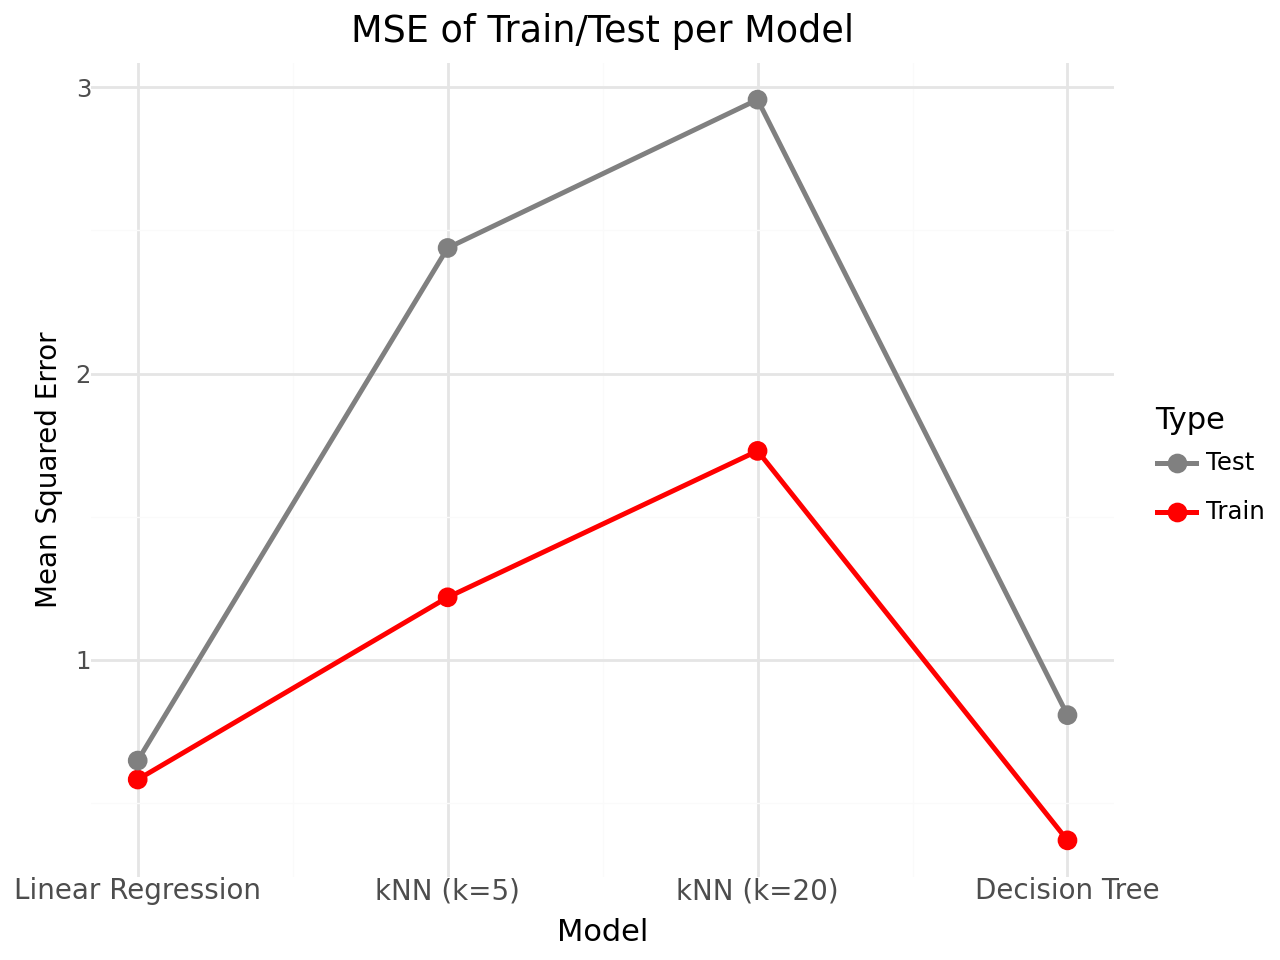

In [88]:
(ggplot(df, aes(x="Model Type", y="MSE", color="Type"))
  + geom_line(aes(group="Type"), size=1)
  + geom_point(size=3)
  + scale_color_manual(values=["gray", "red"])
  + scale_x_continuous(
        breaks=[1, 2, 3, 4],
        labels=["Linear Regression", "kNN (k=5)", "kNN (k=20)", "Decision Tree"]
    )
  + labs(
        title="MSE of Train/Test per Model",
        x="Model",
        y="Mean Squared Error"
    )
  + theme_minimal()
  + theme(
        axis_text_x=element_text(size=10),
        axis_title_y=element_text(size=10)
    )
)

The Decision Tree achieved the lowest training MSE on this split, and the Linear Regression model has the lowest testing MSE. The tree’s test low MSE results may be due to its ability to capture nonlinear effects, such as species or sex and their effect on bill length.